In [2]:
# 데이터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

food = pd.read_csv('Food_Supply_kcal_Data.csv')
life = pd.read_csv('healthy_lifestyle_city_2021.csv')

#food
#life

In [3]:
## food 전처리 ##
food['Undernourished'] = food['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')
food = food.drop('Unit (all except Population)', axis=1)
food = food.dropna()

# 결측값 유무 확인
#food.isnull().sum()

# country 통일
food.loc[food['Country'] == 'United States of America', 'Country'] = 'United States'
food.loc[food['Country'] == 'Russian Federation', 'Country'] = 'Russia'
food.loc[food['Country'] == 'Korea, South', 'Country'] = 'South Korea'

In [4]:
## life 전처리 ##
col_name = {
    'City': 'Country',
    'Rank': 'Rank',
    'Sunshine hours(City)': 'Sunshine hours',
    'Cost of a bottle of water(City)': 'Cost of a bottle of water',
    'Obesity levels(Country)': 'Obesity levels',
    'Life expectancy(years) (Country)': 'Life expectancy(years)',
    'Pollution(Index score) (City)': 'Pollution(Index score)',
    'Annual avg. hours worked': 'Annual avg. hours worked',
    'Happiness levels(Country)': 'Happiness levels',
    'Outdoor activities(City)': 'Outdoor activities',
    'Number of take out places(City)': 'Number of take out places',
    'Cost of a monthly gym membership(City)': 'Cost of a monthly gym membership'
}
life.rename(columns=col_name, inplace=True)

# 결측치 정제 (결측치들 평균 값으로 대체)
life['Sunshine hours'] = life['Sunshine hours'].replace('-', pd.NA)
life['Sunshine hours'] = pd.to_numeric(life['Sunshine hours'], errors='coerce')
mean_Sunshine_hours = life['Sunshine hours'].mean()
life['Sunshine hours'].fillna(mean_Sunshine_hours, inplace=True)
#life['Sunshine hours']

life['Pollution(Index score)'] = life['Pollution(Index score)'].replace('-', pd.NA)
life['Pollution(Index score)'] = pd.to_numeric(life['Pollution(Index score)'], errors='coerce')
mean_Pollution = life['Pollution(Index score)'].mean()
life['Pollution(Index score)'].fillna(mean_Pollution, inplace=True)
#life['Pollution(Index score)']

life['Annual avg. hours worked'] = life['Annual avg. hours worked'].replace('-', pd.NA)
life['Annual avg. hours worked'] = pd.to_numeric(life['Annual avg. hours worked'], errors='coerce')
mean_worked = life['Annual avg. hours worked'].mean()
life['Annual avg. hours worked'].fillna(mean_worked, inplace=True)
#life['Annual avg. hours worked']

# 단위 기호 빼기
life['Obesity levels'] = life['Obesity levels'].astype(str)
life['Obesity levels'] = life['Obesity levels'].str.rstrip('%').astype('float')
#print(life['Obesity levels'])


life['Cost of a bottle of water'] = life['Cost of a bottle of water'].astype(str)
life['Cost of a bottle of water'] = life['Cost of a bottle of water'].str.replace('£', '').astype('float')
#print(life['Cost of a bottle of water'])

life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].astype(str)
life['Cost of a monthly gym membership'] = life['Cost of a monthly gym membership'].str.replace('£', '').astype('float')
#print(life['Cost of a monthly gym membership'])

# city -> country
country_mapping = {
    'Amsterdam': 'Netherlands',
    'Sydney': 'Australia',
    'Vienna': 'Austria',
    'Stockholm': 'Sweden',
    'Copenhagen': 'Denmark',
    'Helsinki': 'Finland',
    'Fukuoka': 'Japan',
    'Berlin': 'Germany',
    'Barcelona': 'Spain',
    'Vancouver': 'Canada',
    'Melbourne': 'Australia',
    'Beijing': 'China',
    'Bangkok': 'Thailand',
    'Buenos Aires': 'Argentina',
    'Toronto': 'Canada',
    'Madrid': 'Spain',
    'Jakarta': 'Indonesia',
    'Seoul': 'South Korea',
    'Frankfurt': 'Germany',
    'Geneva': 'Switzerland',
    'Tel Aviv': 'Israel',
    'Istanbul': 'Turkey',
    'Cairo': 'Egypt',
    'Taipei': 'Taiwan',
    'Los Angeles': 'United States',
    'Mumbai': 'India',
    'Boston': 'United States',
    'Dublin': 'Ireland',
    'Tokyo': 'Japan',
    'Chicago': 'United States',
    'Hong Kong': 'Hong Kong',
    'Shanghai': 'China',
    'Brussels': 'Belgium',
    'San Francisco': 'United States',
    'Paris': 'France',
    'Sao Paulo': 'Brazil',
    'Zurich': 'Switzerland',
    'London': 'United Kingdom',
    'Johannesburg': 'South Africa',
    'Milan': 'Italy',
    'Washington, D.C.': 'United States',
    'New York': 'United States',
    'Moscow': 'Russia',
    'Mexico City': 'Mexico'
}
life['Country'] = life['Country'].replace(country_mapping)

In [5]:
# 전처리한 food 확인하기
food

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,45.3184,4.2741,0.3525,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,34.9900,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,42.7586,7.5417,0.6674,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,39.0364,1.3279,1.9578,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,46.5455,3.9515,0.3636,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,46.7081,3.0062,0.4472,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0


In [6]:
# 전처리한 life 확인하기
life

,Country,Rank,Sunshine hours,Cost of a bottle of water,Obesity levels,Life expectancy(years),Pollution(Index score),Annual avg. hours worked,Happiness levels,Outdoor activities,Number of take out places,Cost of a monthly gym membership
0,Netherlands,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90
1,Australia,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66
2,Austria,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74
3,Sweden,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31
4,Denmark,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53
5,Finland,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23
6,Japan,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87
7,Germany,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11
8,Spain,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80
9,Canada,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04


In [7]:
# 7. 물, 일조량 등의 환경적 요인과 영양결핍률의 관계

In [8]:
import pandas as pd

# 'Country'를 기준으로 두 데이터셋 merge
food_and_life = pd.merge(food, life, on='Country', how='inner')

food_and_life

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Sunshine hours,Cost of a bottle of water,Obesity levels,Life expectancy(years),Pollution(Index score),Annual avg. hours worked,Happiness levels,Outdoor activities,Number of take out places,Cost of a monthly gym membership
0,Argentina,1.4354,14.9869,1.0650,0.0000,16.7927,0.8643,0.2006,1.4663,9.4459,...,2525.000000,0.57,28.3,75.9,52.640000,1672.909091,5.97,246,1435,22.45
1,Australia,1.9783,15.6146,1.9027,0.0000,11.6430,0.4681,0.6040,1.6611,7.4902,...,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66
2,Australia,1.9783,15.6146,1.9027,0.0000,11.6430,0.4681,0.6040,1.6611,7.4902,...,2363.000000,1.57,29.0,82.1,25.900000,1712.000000,7.22,243,813,36.89
3,Austria,2.8161,15.6106,5.2532,0.0000,12.3748,0.7853,0.4062,1.5976,5.0095,...,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74
4,Belgium,2.3089,14.1587,4.7771,0.0000,13.0441,0.6900,0.5971,1.3800,3.2776,...,1546.000000,2.11,22.1,80.4,62.670000,1583.000000,6.86,55,988,25.34
5,Brazil,1.4314,13.2061,1.5238,0.0000,14.5913,0.4464,0.2309,1.7239,7.1571,...,2003.000000,0.44,22.1,73.9,79.780000,1672.909091,6.37,158,3355,16.07
6,China,1.2768,16.1844,1.1773,0.0209,17.3827,1.2349,1.2872,1.2924,9.8896,...,2671.000000,0.26,6.2,75.4,85.430000,1672.909091,5.12,223,261,38.62
7,China,1.2768,16.1844,1.1773,0.0209,17.3827,1.2349,1.2872,1.2924,9.8896,...,1776.000000,0.29,6.2,75.4,77.400000,1672.909091,5.12,108,346,44.68
8,Denmark,2.4239,17.7505,5.0547,0.0000,13.3757,0.9607,0.9459,1.5814,5.0103,...,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53
9,Egypt,0.0301,4.1999,0.5269,0.0000,32.2144,0.1957,0.6322,2.5591,1.6408,...,3542.000000,0.16,32.0,70.7,91.740000,1672.909091,4.15,323,250,23.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           40 non-null     object 
 1   Alcoholic Beverages               40 non-null     float64
 2   Animal Products                   40 non-null     float64
 3   Animal fats                       40 non-null     float64
 4   Aquatic Products, Other           40 non-null     float64
 5   Cereals - Excluding Beer          40 non-null     float64
 6   Eggs                              40 non-null     float64
 7   Fish, Seafood                     40 non-null     float64
 8   Fruits - Excluding Wine           40 non-null     float64
 9   Meat                              40 non-null     float64
 10  Milk - Excluding Butter           40 non-null     float64
 11  Miscellaneous                     40 non-null     float64
 12  Offals    

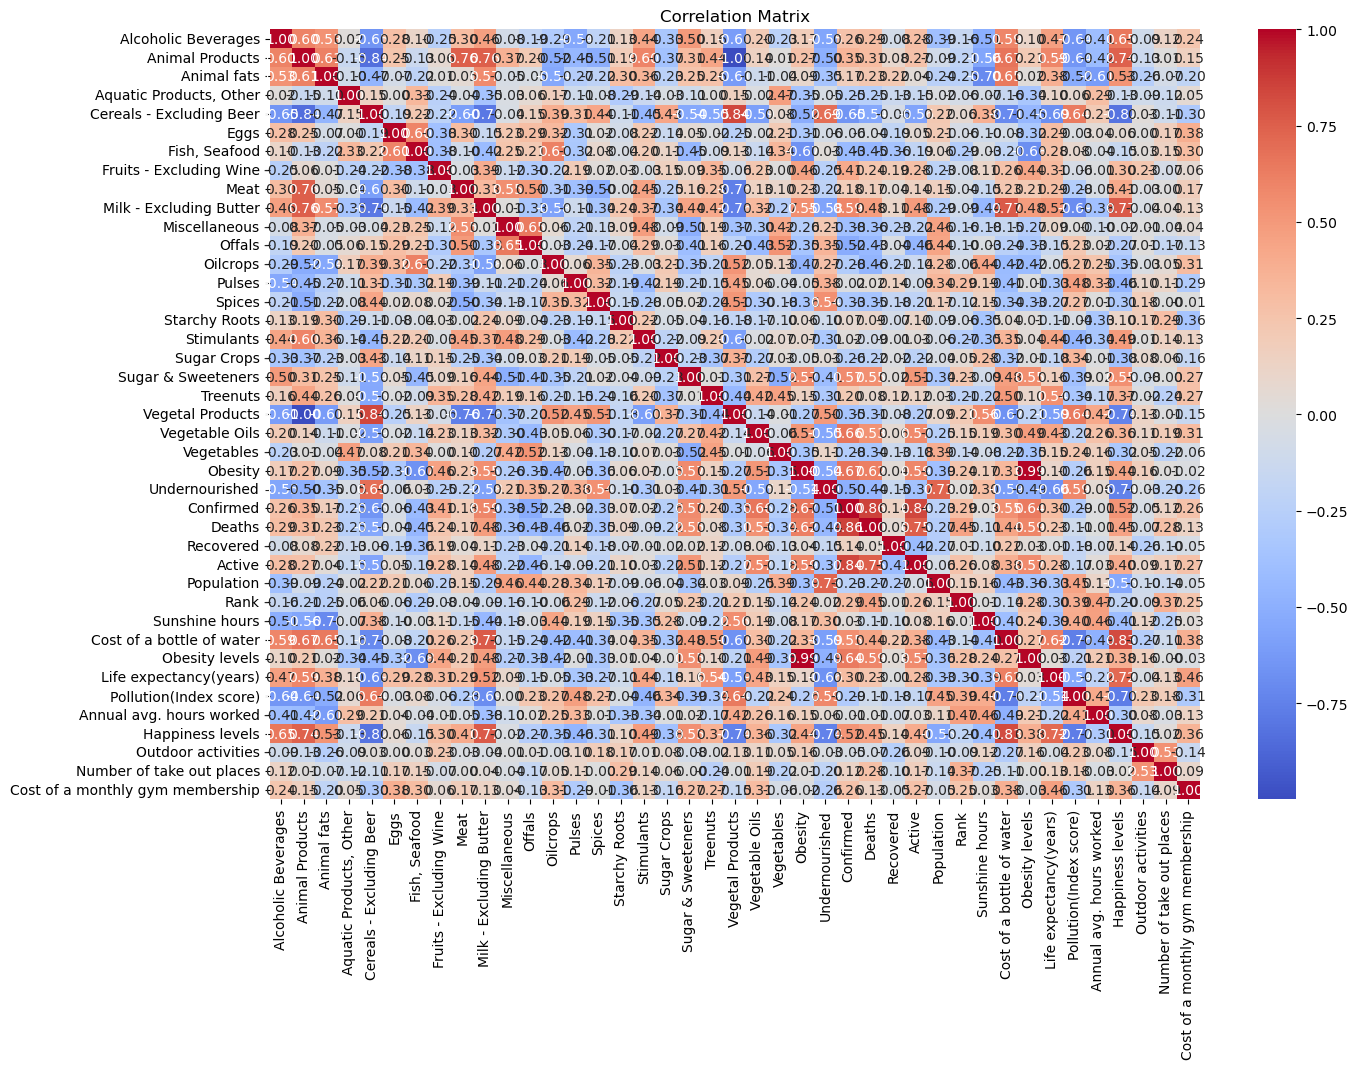

In [9]:
food_and_life.info()

# 숫자형 데이터만 선택
num_data = food_and_life.select_dtypes(include=['float64', 'int64'])

correlation_matrix = num_data.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# 위 히트맵은 분석하기가 힘든 관계로 필요한 열만 선택하여 히트맵을 다시 그림

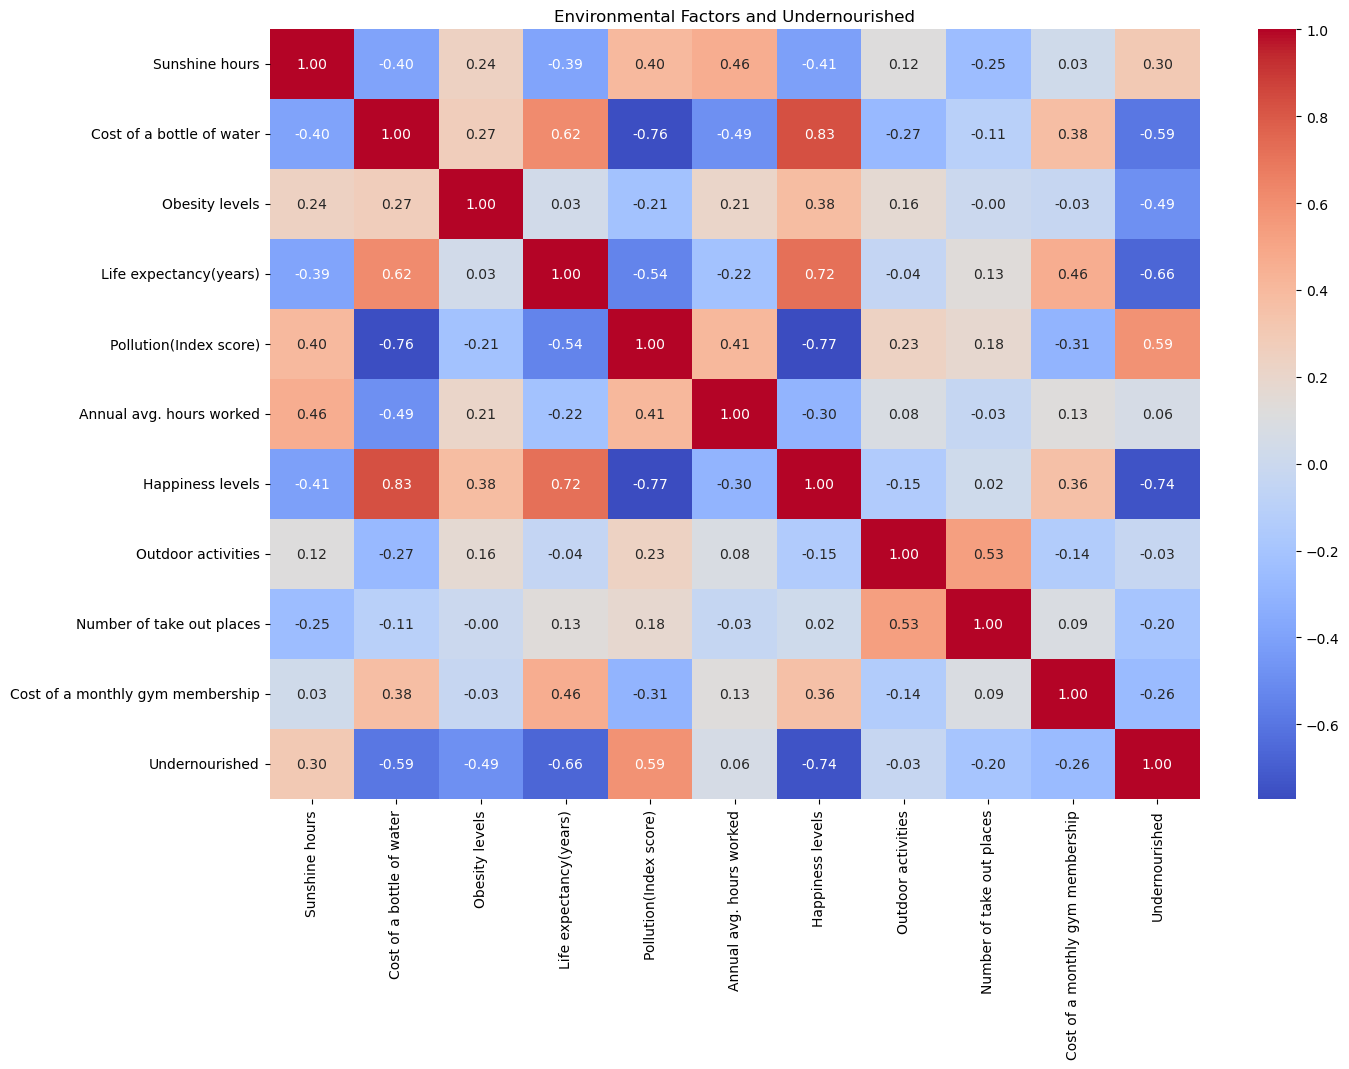

In [11]:
# 환경적 요인(ex. 물, 일조량 등)과 영양결핍률의 관계

life_and_undernourished = food_and_life.loc[:, 'Sunshine hours':'Cost of a monthly gym membership']
life_and_undernourished['Undernourished'] = food_and_life['Undernourished']

df_corr = life_and_undernourished.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Environmental Factors and Undernourished')
plt.show()

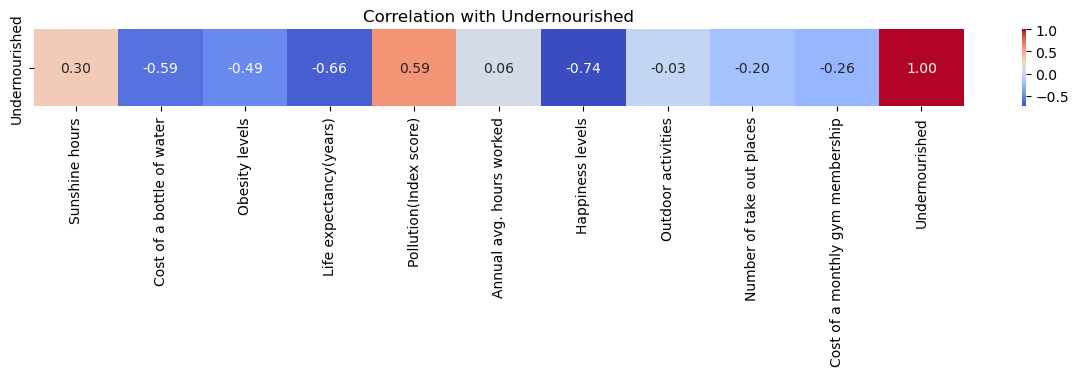

In [12]:
# 환경적 요인(ex. 물, 일조량 등)과 영양결핍률의 관계 

# 영양결핍률의 관계가 더욱 돋보이도록 'Undernourished' 행만 선택
undernourished_corr = life_and_undernourished.corr()['Undernourished'].to_frame().T

plt.figure(figsize=(15, 1))
sns.heatmap(undernourished_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Undernourished')
plt.show()

In [13]:
# 'Undernourished'와의 상관관계가 0.5보다 크거나 -0.5보다 작은 변수들만 선택
significant_corr = undernourished_corr[(abs(undernourished_corr) > 0.5) | (abs(undernourished_corr) < -0.5)].dropna(axis=1, how='all')

print("Significant Correlations:")
significant_corr

Significant Correlations:


,Cost of a bottle of water,Life expectancy(years),Pollution(Index score),Happiness levels,Undernourished
Undernourished,-0.594109,-0.664252,0.58512,-0.744896,1.0


In [14]:
# 물 한 병의 가격이 영양결핍률과 음의 상관관계가 있다는 것을 알 수 있음

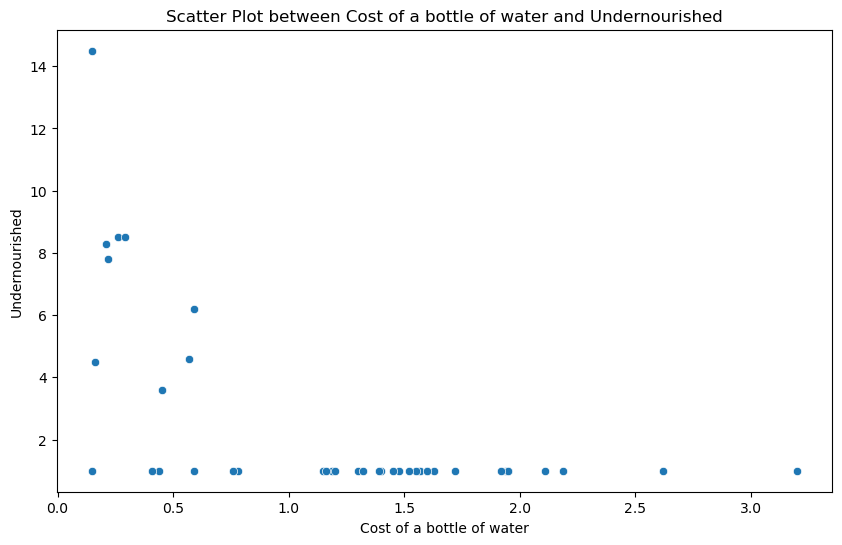

In [15]:
# 'Cost of a bottle of water'과 'Undernourished' 간의 산점도

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of a bottle of water', y='Undernourished', data=life_and_undernourished)
plt.title('Scatter Plot between Cost of a bottle of water and Undernourished')
plt.xlabel('Cost of a bottle of water')
plt.ylabel('Undernourished')
plt.show()

In [16]:
# 'Undernourished'와 각 변수들 간의 선형회귀분석을 위해 오차항의 가정(정규성, 등분산성, 독립성 검정 진행)

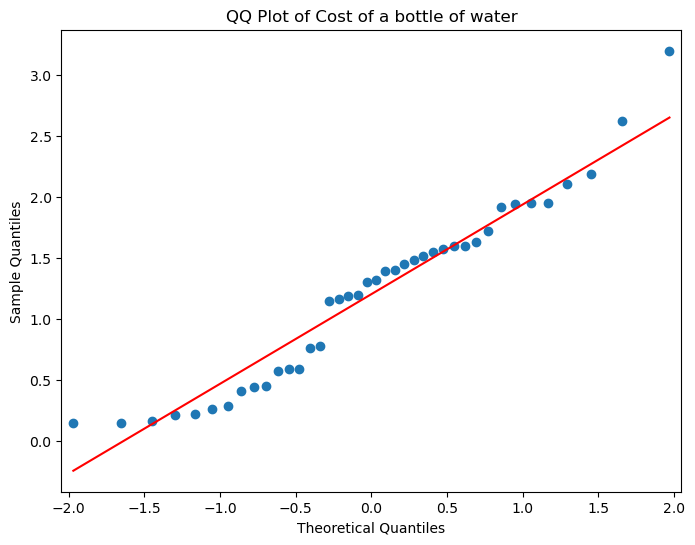

Column: Cost of a bottle of water, Shapiro-Wilk 테스트 통계량: 0.9464963674545288, p-value: 0.057488057762384415


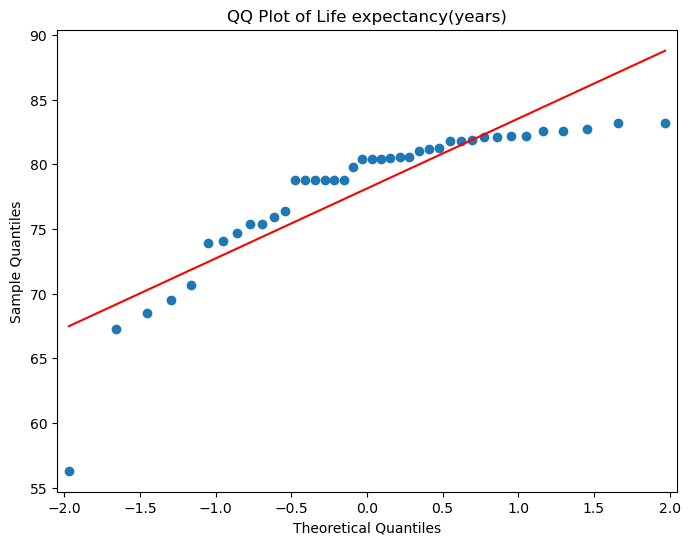

Column: Life expectancy(years), Shapiro-Wilk 테스트 통계량: 0.7791827321052551, p-value: 2.564572696428513e-06


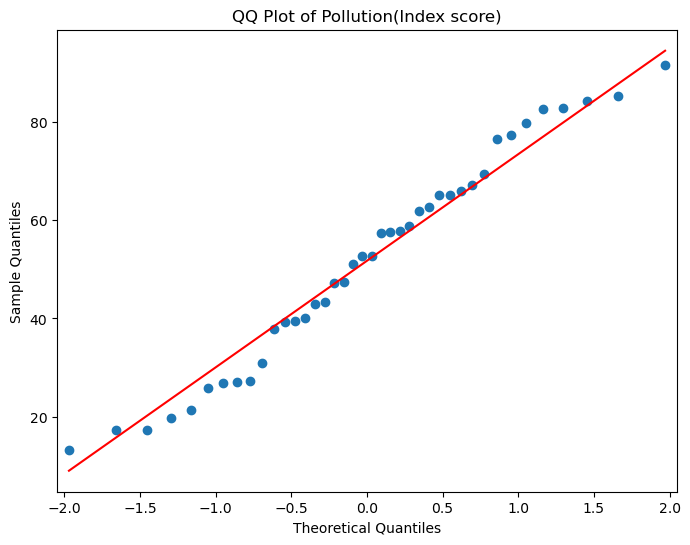

Column: Pollution(Index score), Shapiro-Wilk 테스트 통계량: 0.9643104672431946, p-value: 0.2344880849123001


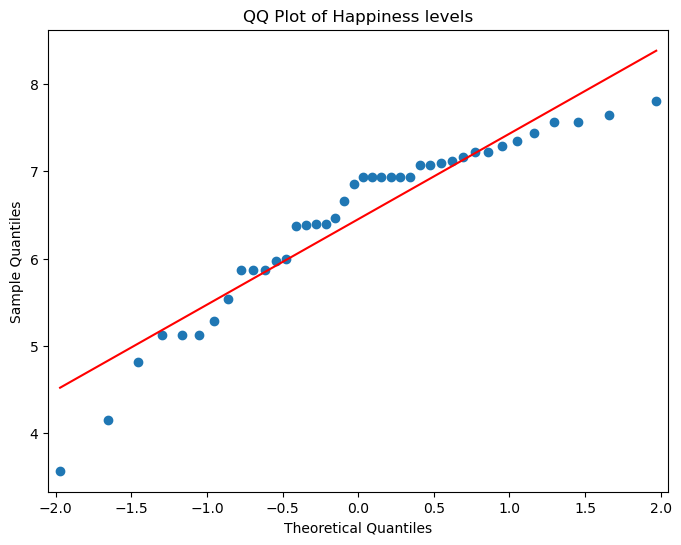

Column: Happiness levels, Shapiro-Wilk 테스트 통계량: 0.9068970084190369, p-value: 0.0030534756369888783


In [17]:
# 정규성 검사 - qqplot

import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Significant Correlations에서 종속변수인 'Undernourished'를 제외한 변수들 선택
columns_to_test = significant_corr.columns.drop('Undernourished')

# 각 변수에 대한 정규성 검정 및 QQ 플롯 그리기
for column in columns_to_test:
    # 해당 열의 데이터 추출
    data = life_and_undernourished[column]
    
    # QQ 플롯 그리기
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(data, line='s', ax=ax)
    plt.title(f"QQ Plot of {column}")
    plt.show()

    # Shapiro-Wilk 테스트
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(data)
    print(f"Column: {column}, Shapiro-Wilk 테스트 통계량: {shapiro_test_statistic}, p-value: {shapiro_p_value}")


In [18]:
# 정규성 검정 - 정규/비정규 결과 출력

columns_to_test = significant_corr.columns.drop('Undernourished')

normality_results = []

for column in columns_to_test:
    data = life_and_undernourished[column]
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(data)
    normality_results.append({
        'Column': column,
        'Shapiro-Wilk 테스트 통계량': shapiro_test_statistic,
        'p-value': shapiro_p_value,
        'Normality': '정규' if shapiro_p_value > 0.05 else '비정규'
    })

for result in normality_results:
    print(f"Column: {result['Column']}, p-value: {result['p-value']}, Normality: {result['Normality']}")

Column: Cost of a bottle of water, p-value: 0.057488057762384415, Normality: 정규
Column: Life expectancy(years), p-value: 2.564572696428513e-06, Normality: 비정규
Column: Pollution(Index score), p-value: 0.2344880849123001, Normality: 정규
Column: Happiness levels, p-value: 0.0030534756369888783, Normality: 비정규


In [19]:
# Cost of a bottle of water과 Pollution(Index score)이 정규성을 따름
# Life expectancy(years)와 Happiness levels은 정규성을 따르지 않으므로 비모수 테스트 진행

# Mann-Whitney U 검정 : 두 개의 독립된 집단 간의 차이를 비교하는 비모수적인 방법 중 하나
# Mann-Whitney U 검정을 사용하여 'Undernourished'와 'Life expectancy(years)', 'Undernourished'와 'Happiness levels' 간의 차이 검정 가능. 

In [20]:
# 비모수 테스트 - Life expectancy(years), Happiness levels

from scipy.stats import mannwhitneyu

# 변수 선택
columns_to_test = ['Life expectancy(years)', 'Happiness levels']

# 각 변수에 대한 Mann-Whitney U 검정 수행
for column in columns_to_test:
    statistic, p_value = mannwhitneyu(life_and_undernourished['Undernourished'], life_and_undernourished[column])
    
    # 결과 출력
    print(f'Mann-Whitney U 검정({column}): 통계량={statistic}, p-value={p_value}')

    # 유의수준 0.05에서의 검정 결과 해석
    alpha = 0.05
    if p_value < alpha:
        print(f"귀무가설을 기각하며, 'Undernourished'와 '{column}' 간에는 통계적으로 유의미한 차이가 있다.")
    else:
        print(f"귀무가설을 기각하지 못하며, 'Undernourished'와 '{column}' 간에는 통계적으로 유의미한 차이가 없다.")
    print()

Mann-Whitney U 검정(Life expectancy(years)): 통계량=0.0, p-value=2.202472491963789e-15
귀무가설을 기각하며, 'Undernourished'와 'Life expectancy(years)' 간에는 통계적으로 유의미한 차이가 있다.

Mann-Whitney U 검정(Happiness levels): 통계량=217.5, p-value=7.824605827737411e-09
귀무가설을 기각하며, 'Undernourished'와 'Happiness levels' 간에는 통계적으로 유의미한 차이가 있다.



In [32]:
# 등분산성 검정

from scipy.stats import levene

# 변수 선택
columns_to_test = ['Cost of a bottle of water', 'Pollution(Index score)', 'Life expectancy(years)', 'Happiness levels']

# 각 변수에 대한 등분산성 검정 수행
for column in columns_to_test:
    stat_levene, p_value_levene = levene(life_and_undernourished['Undernourished'], life_and_undernourished[column])
    
    # 결과 출력
    print(f'등분산성 검정({column}): Statistic={stat_levene:.4f}, p-value={p_value_levene:.20f}')

    # 유의수준 0.05에서의 검정 결과 해석
    alpha = 0.05
    if p_value_levene < alpha:
        print(f"귀무가설을 기각하며, 'Undernourished'와 '{column}' 간에는 등분산성이 없다고 할 수 있다.")
    else:
        print(f"귀무가설을 기각하지 못하며, 'Undernourished'와 '{column}' 간에는 등분산성이 있다고 할 수 있다.")
    print()

등분산성 검정(Cost of a bottle of water): Statistic=2.8793, p-value=0.09371036753678681219
귀무가설을 기각하지 못하며, 'Undernourished'와 'Cost of a bottle of water' 간에는 등분산성이 있다고 할 수 있다.

등분산성 검정(Pollution(Index score)): Statistic=77.7544, p-value=0.00000000000024355064
귀무가설을 기각하며, 'Undernourished'와 'Pollution(Index score)' 간에는 등분산성이 없다고 할 수 있다.

등분산성 검정(Life expectancy(years)): Statistic=5.8280, p-value=0.01811651131310790253
귀무가설을 기각하며, 'Undernourished'와 'Life expectancy(years)' 간에는 등분산성이 없다고 할 수 있다.

등분산성 검정(Happiness levels): Statistic=1.8162, p-value=0.18166258330400680832
귀무가설을 기각하지 못하며, 'Undernourished'와 'Happiness levels' 간에는 등분산성이 있다고 할 수 있다.



In [21]:
# 유의미성 확인 - Cost of a bottle of water, Pollution(Index score)

from scipy.stats import mannwhitneyu

# 변수 선택
columns_to_test = ['Cost of a bottle of water', 'Pollution(Index score)']

# 각 변수에 대한 Mann-Whitney U 검정 수행
for column in columns_to_test:
    statistic, p_value = mannwhitneyu(life_and_undernourished['Undernourished'], life_and_undernourished[column])
    
    # 결과 출력
    print(f'Mann-Whitney U 검정({column}): 통계량={statistic}, p-value={p_value}')

    # 유의수준 0.05에서의 검정 결과 해석
    alpha = 0.05
    if p_value < alpha:
        print(f"귀무가설을 기각하며, 'Undernourished'와 '{column}' 간에는 통계적으로 유의미한 차이가 있다.")
    else:
        print(f"귀무가설을 기각하지 못하며, 'Undernourished'와 '{column}' 간에는 통계적으로 유의미한 차이가 없다.")
    print()

Mann-Whitney U 검정(Cost of a bottle of water): 통계량=825.0, p-value=0.8080630798178874
귀무가설을 기각하지 못하며, 'Undernourished'와 'Cost of a bottle of water' 간에는 통계적으로 유의미한 차이가 없다.

Mann-Whitney U 검정(Pollution(Index score)): 통계량=1.0, p-value=2.4293349474763546e-15
귀무가설을 기각하며, 'Undernourished'와 'Pollution(Index score)' 간에는 통계적으로 유의미한 차이가 있다.



In [35]:
# 정규성 O -> Cost of a bottle of water, Pollution(Index score)
# 등분산성 O -> Cost of a bottle of water, Happiness levels

# 정규성과 등분산성을 모두 만족하는 변수는 Cost of a bottle of water이므로 Undernourished과 Cost of a bottle of water의 피어슨 상관계수 검정 진행.
# 피어슨 상관계수 검정 - 두 변수 간의 선형 관계 측정 가능

In [36]:
from scipy.stats import pearsonr

a = life_and_undernourished['Undernourished']
b = life_and_undernourished['Cost of a bottle of water']

# 피어슨 상관계수 계산
correlation_pearson, p_value_pearson = pearsonr(a, b)

print(f'Pearson 상관계수: {correlation_pearson:.4f}', f'p-value: {p_value_pearson:.20f}')

# 유의수준 0.05에서의 검정 결과 해석
if p_value_pearson < alpha:
    print(f"귀무가설을 기각하며, 'Undernourished'와 'Cost of a bottle of water' 간에는 피어슨 상관계수로 유의미한 선형 관계가 있다.")
else:
    print(f"귀무가설을 기각하지 못하며, 'Undernourished'와 'Cost of a bottle of water' 간에는 피어슨 상관계수로 유의미한 선형 관계가 없다.")

Pearson 상관계수: -0.5941 p-value: 0.00005307035307877404
귀무가설을 기각하며, 'Undernourished'와 'Cost of a bottle of water' 간에는 피어슨 상관계수로 유의미한 선형 관계가 있다.


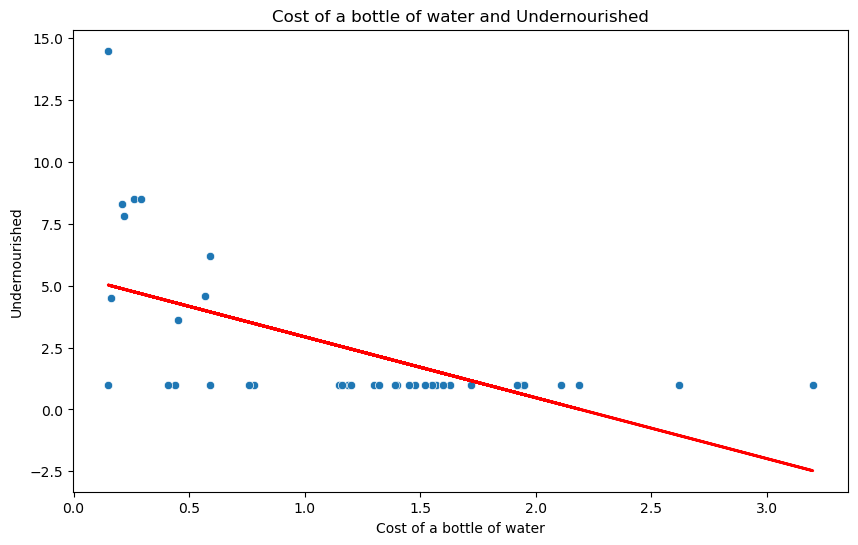

In [25]:
# 'Cost of a bottle of water'와 'Undernourished' 간의 선형회귀분석

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

X = life_and_undernourished[['Cost of a bottle of water']]
y = life_and_undernourished['Undernourished']

regression_model.fit(X, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of a bottle of water', y='Undernourished', data=life_and_undernourished)
plt.plot(X, regression_model.predict(X), color='red', linewidth=2)
plt.title('Cost of a bottle of water and Undernourished')
plt.xlabel('Cost of a bottle of water')
plt.ylabel('Undernourished')
plt.show()